Cargamos las librerías

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns


Nos aseguramos que el GPU este bien configurado

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


Cargamos el Dataset y obtenemos información del mismo

In [4]:
# Cargar datos de entrenamiento y prueba
data = pd.read_csv(r"C:\Users\52555\Documents\Proyectos\Machine Learning\House Prices\House Prices\train.csv")
por_predecir = pd.read_csv(r"C:\Users\52555\Documents\Proyectos\Machine Learning\House Prices\House Prices\test.csv")


Preprocesamiento de Datos

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
# Imprimir valores nulos con sus índices
for index, row in data.iterrows():
    for col in data.columns:
        if pd.isnull(row[col]):
            print(f'Valor nulo en la entrada: {index}, columna:{col}')

Valor nulo en la entrada: 0, columna:Alley
Valor nulo en la entrada: 0, columna:FireplaceQu
Valor nulo en la entrada: 0, columna:PoolQC
Valor nulo en la entrada: 0, columna:Fence
Valor nulo en la entrada: 0, columna:MiscFeature
Valor nulo en la entrada: 1, columna:Alley
Valor nulo en la entrada: 1, columna:MasVnrType
Valor nulo en la entrada: 1, columna:PoolQC
Valor nulo en la entrada: 1, columna:Fence
Valor nulo en la entrada: 1, columna:MiscFeature
Valor nulo en la entrada: 2, columna:Alley
Valor nulo en la entrada: 2, columna:PoolQC
Valor nulo en la entrada: 2, columna:Fence
Valor nulo en la entrada: 2, columna:MiscFeature
Valor nulo en la entrada: 3, columna:Alley
Valor nulo en la entrada: 3, columna:MasVnrType
Valor nulo en la entrada: 3, columna:PoolQC
Valor nulo en la entrada: 3, columna:Fence
Valor nulo en la entrada: 3, columna:MiscFeature
Valor nulo en la entrada: 4, columna:Alley
Valor nulo en la entrada: 4, columna:PoolQC
Valor nulo en la entrada: 4, columna:Fence
Valor nul

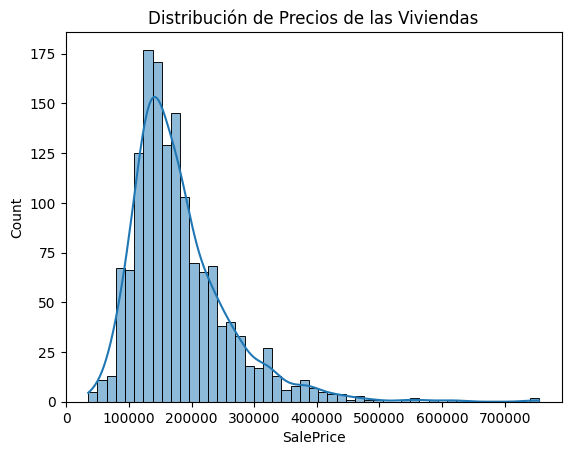

In [6]:
# Visualizar la distribución de precios de las viviendas
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribución de Precios de las Viviendas')
plt.show()

Procesamiento de datos

In [9]:
#Eliminamos la columna del ID ya que no la necesitamos para entrenar el modelo
data_df = data.drop('Id', axis=1)

In [10]:
#Nos quedaremos únicamente con las columnas númericas
df_num = data_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


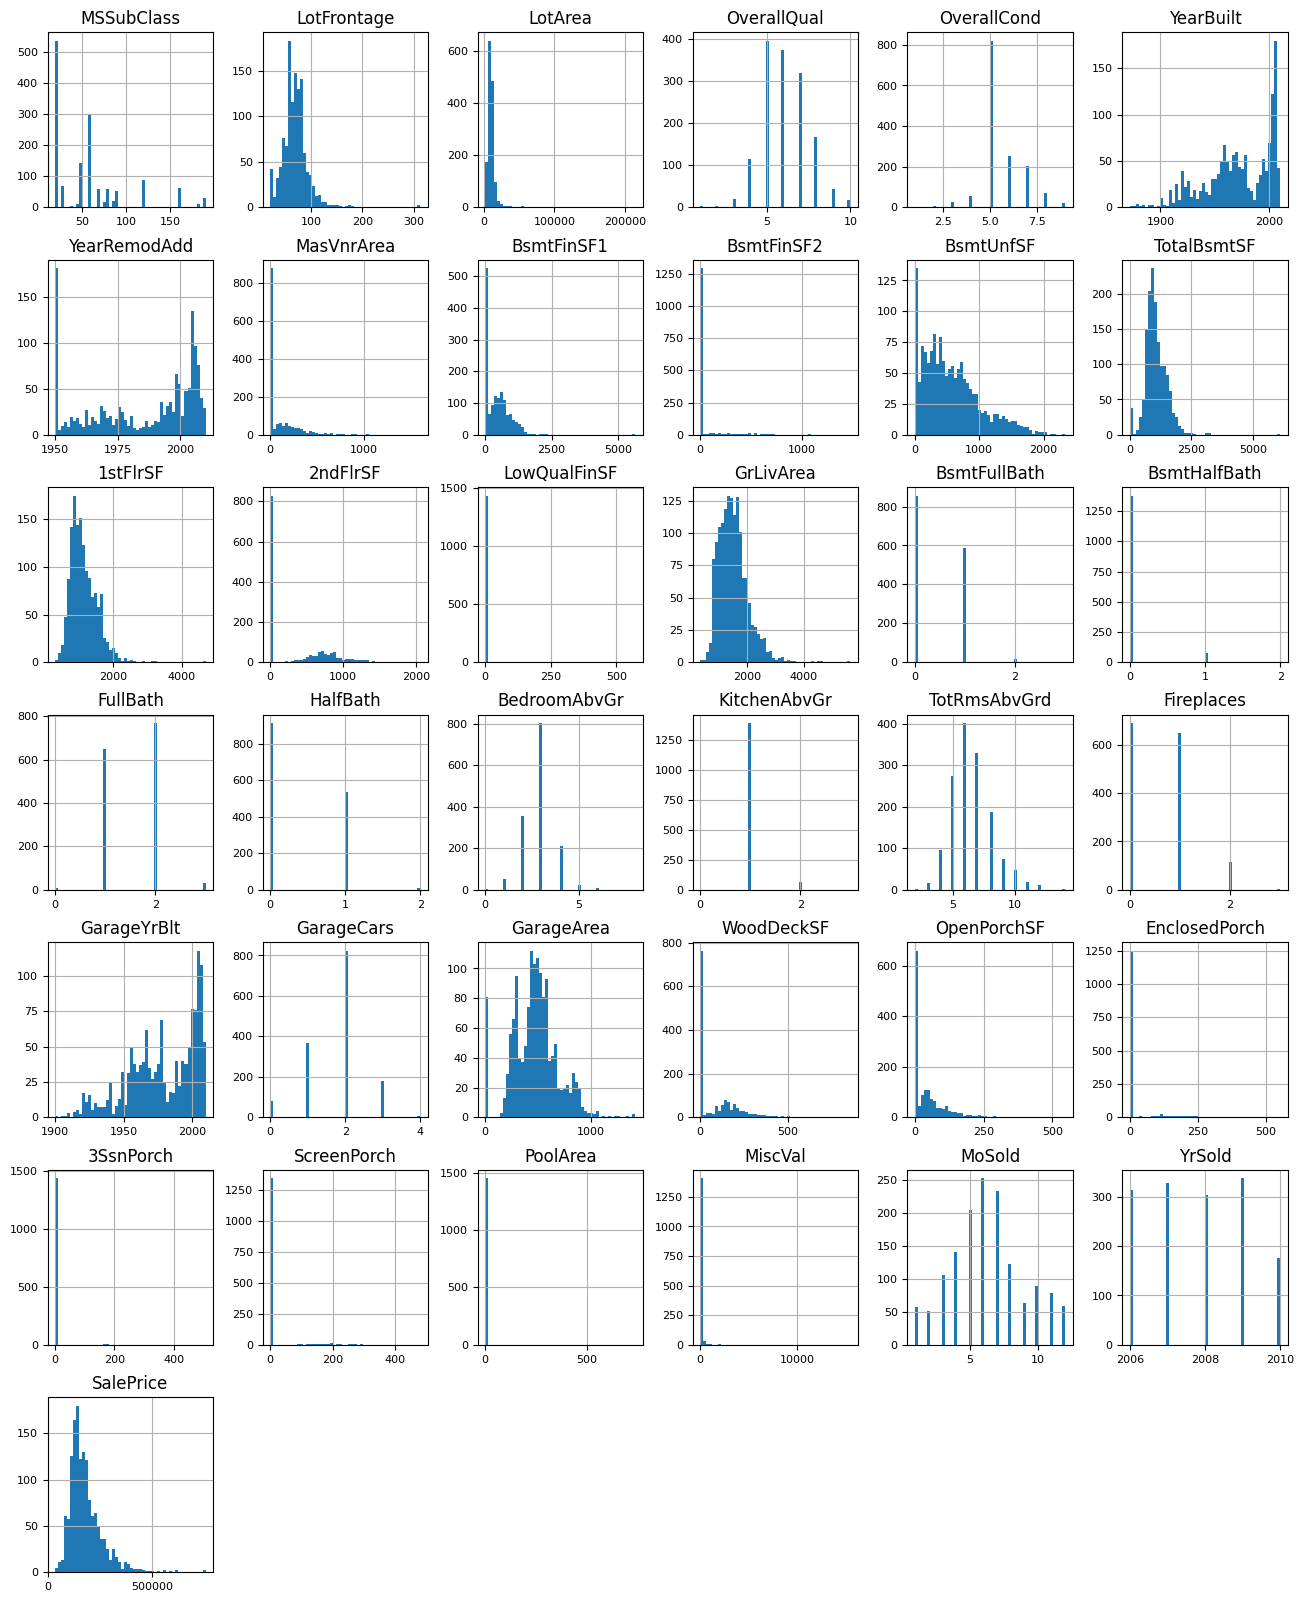

In [11]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);